# Logistic Regression From Scratch Assignment.
- Implement logistic regression from scratch using only minimum library such as numpy

## Problem 1: Hypothetical Function

- Logistic regression assumption function is the linear regression assumption function passed through the <b> Sigmoid Function. </b>

- Logistic regression assumption function is as follows:

$$
h_{i}{(x)} = \frac{1}{1+ e^-i^T.x}
$$

In [ ]:
# function to calculate sigmoid
def _sigmoid(self,y): # input y
        return 1 / (1+np.exp(-y)) # return the sigmoid from input y
#     
def _logistic_hypothesis(self,X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred

## Question 2: The steepest descent method


$$
\frac{\partial{}}{\partial{i_{j}}}J(i) = (\frac{1}{m}\sum_{i=1}^{m}[(h_{i}(x^{(i)}) - y^{(i)})(x_{j}^{(i)})]) + \frac{l}{m}i_{j}
$$

- the above term includes a regularization term $ l $ used to prevent overfitting

In [ ]:
def _gradient_descent(self,X,y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient+= (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient + self.lam * self.theta[j]) / m)

## Question 3: Presumption

In [ ]:
# return value pred is the output of the hypothetical function
def predict_proba(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
    
# predict function return dicrete value (0 or 1) by setting a threshold on that value
def predict(self,X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X]) 
        return np.where(self._logistic_hypothesis(X) >= 0.5,1,0)
    


## Question 4: Objective Function
- objective function(loss function) formula

$$
J_{i} = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_{i}(x^{(i)}) - (1-y^{(i)})log(1 - h_{i}(x^{(i)})] + \frac{l}{2m} \sum_{j=1}^{n} i_{j}^{2}
$$

In [ ]:
def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] * np.log(pred[i]) + (1-y[i]) * np.log(1 - pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta ** 2) * self.lam / (2 * y.shape[0])
        return loss

## Question 5: Learning and Estimation

- We compile the whole code and implement using binary classification of virgicolor and virginica as prepared in the introductiion course
- Compare with scikit learn implementation
- use scikit learn for index values such as Accuracy, precision and recall

In [25]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [1]:
# compile the whole code
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, bias, verbose,lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])
        
    def fit(self, X, y, X_val, y_val):
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}The learning loss is{}'.format(i,loss))
    
    def _gradient_descent(self,X,y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient+= (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient + self.lam * self.theta[j]) / m)
    def _sigmoid(self,y):
        return 1 / (1+np.exp(-y))
    
    def _logistic_hypothesis(self,X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
    
    def predict(self,X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X]) 
        return np.where(self._logistic_hypothesis(X) >= 0.5,1,0)
    
    def predict_proba(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
    
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] * np.log(pred[i]) + (1-y[i]) * np.log(1 - pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta ** 2) * self.lam / (2 * y.shape[0])
        return loss
    

In [4]:
# load the iris dataset for virgicolor and virginica as in the course 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2)


In [5]:
# initialize the constructor with these values and instantiate the object
slr = ScratchLogisticRegression(num_iter=10, lr=0.01, bias=False, verbose=True,lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

0The learning loss is0.6931472220569183
1The learning loss is0.6866481640647207
2The learning loss is0.680647620907743
3The learning loss is0.675038242149112
4The learning loss is0.6697377102555271
5The learning loss is0.6646829585355178
6The learning loss is0.659825681640891
7The learning loss is0.6551288716862647
8The learning loss is0.6505641571973938
9The learning loss is0.6461097646849984


In [56]:
# lets predict the results
slr.predict(X_test)

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

#### Lets compare with scikit learn

In [7]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_predL = LogReg.predict(X_test)
y_predL

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

#### Accuracy Score

In [57]:
# lets calculate accuracy
#accuracy score for scratch implementation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, slr.predict(X_test))

1.0

In [10]:
#accuracy score for scikit implementation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predL)

1.0

#### Precision Score

In [58]:
#precision score for scratch implementation
from sklearn.metrics import precision_score
precision_score(y_test, slr.predict(X_test)) # for precision score best value is 1 worst value is 0

1.0

In [12]:
#precision score for scratch implementation
from sklearn.metrics import precision_score
precision_score(y_test, y_predL) # for precision score best value is 1 worst value is 0

1.0

#### Recall Value

In [13]:
# recall score for scratch implementation
from sklearn.metrics import recall_score
recall_score(y_test, slr.predict(X_test)) #for recall_score best value is 1 worst value is 0

1.0

In [14]:
# recall score for scratch implementation
from sklearn.metrics import recall_score
recall_score(y_test, y_predL) #for recall_score best value is 1 worst value is 0

1.0

## Question 6: Learning Curve Plot
- Look at the learnng curve to see if the loss is dropping properly

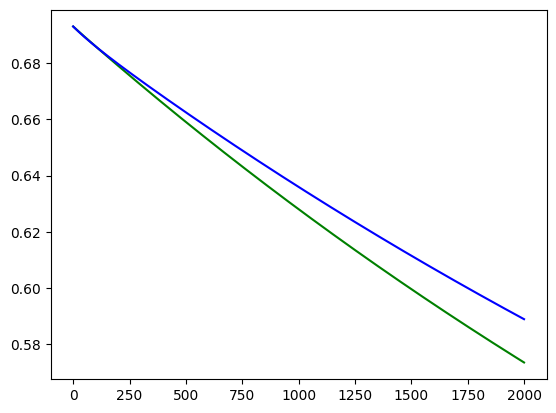

In [59]:
plt.plot(slr.loss, color = 'green')
plt.plot(slr.val_loss, color = 'blue')

## Problem 7: Visualization of the decision region
- Visualize the decision region

- Beacause learning is performed with two variables in order to draw using only two fit variables. We will reload the iris data and use 2 feature variables instead.

In [51]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001,bias=True,verbose=False,lam = 0.1) # i have set verbose to false to avoid printing all the 2000 iterations
slr.fit(X_train, y_train,X_test,y_test)

In [52]:
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

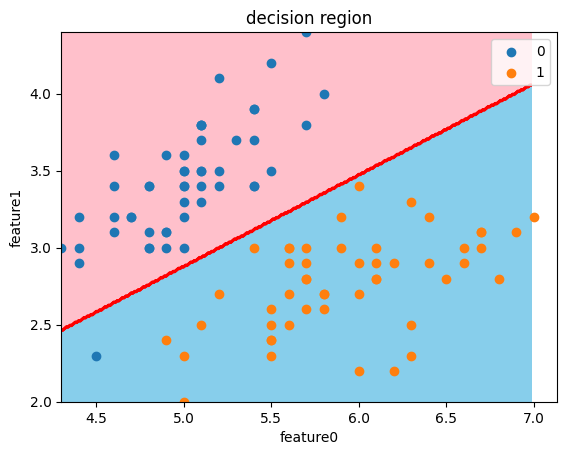

In [53]:
decision_region(X, y, slr)

## Problem 8: (Advanced Exercise) Saving Weights

- I will use the pickle module to save the learned weights

In [54]:
# using pickle module
import pickle # importing pickle to save data
filename = 'learned_weights' # create filename called learned_weights
pickle.dump(slr, open(filename, 'wb')) # giving write permission to enable file saving


In [55]:
loaded_slr = pickle.load(open(filename, 'rb')) # loading our saved model and giving read permission
loaded_slr.predict(X_test) # using our saved model to do predictions

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])